In [27]:
import numpy as np
import pandas as pd
import ants
import os

from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime; now = datetime.now;t0 = now()

In [28]:
atlas = ants.image_read('../Data/YeoAtlas/Atlas_parc-7n_2mm.nii')

In [29]:
df = pd.read_csv('../Data/comb_df.csv')
n = len(df)
df

,Unnamed: 0,participant_id,diag,age,sex,fiq,site,DSMIV,ados_total,ados_social,ados_comm,ados_rrb,dataset
0,0,50002,1,16.77,1,103.0,13,1.0,12.0,8.0,4.0,3.0,ABIDE I
1,2,50004,1,19.09,1,113.0,13,1.0,18.0,12.0,6.0,2.0,ABIDE I
2,3,50005,1,13.73,2,119.0,13,1.0,12.0,8.0,4.0,1.0,ABIDE I
3,4,50006,1,13.37,1,109.0,13,1.0,12.0,8.0,4.0,4.0,ABIDE I
4,9,50011,1,16.93,1,111.0,13,1.0,13.0,9.0,4.0,NaN,ABIDE I
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,746,30163,2,8.00,2,136.0,ABIDEII-OHSU_1,NaN,NaN,NaN,NaN,NaN,ABIDE II
1498,747,30164,2,10.00,2,115.0,ABIDEII-OHSU_1,NaN,NaN,NaN,NaN,NaN,ABIDE II
1499,748,30165,2,12.00,2,120.0,ABIDEII-OHSU_1,NaN,NaN,NaN,NaN,NaN,ABIDE II
1500,749,30166,2,10.00,2,112.0,ABIDEII-OHSU_1,NaN,NaN,NaN,NaN,NaN,ABIDE II


In [31]:
mis = df.iloc[~np.array([exists_subdir(s,df) for s in range(len(df))])]
mis

,Unnamed: 0,participant_id,diag,age,sex,fiq,site,DSMIV,ados_total,ados_social,ados_comm,ados_rrb,dataset
853,757,28681,1,18.000000,1,117.0,ABIDEII-ONRC_2,NaN,10.0,7.0,3.0,0.0,ABIDE II
855,759,28683,1,28.000000,1,120.0,ABIDEII-ONRC_2,NaN,10.0,6.0,4.0,0.0,ABIDE II
859,763,28687,1,18.000000,1,91.0,ABIDEII-ONRC_2,NaN,7.0,5.0,2.0,0.0,ABIDE II
880,788,28711,2,22.000000,2,103.0,ABIDEII-ONRC_2,NaN,3.0,0.0,3.0,0.0,ABIDE II
881,789,28712,2,20.000000,1,103.0,ABIDEII-ONRC_2,NaN,3.0,0.0,3.0,0.0,ABIDE II
882,790,28713,2,18.000000,2,106.0,ABIDEII-ONRC_2,NaN,2.0,0.0,2.0,1.0,ABIDE II
1297,501,29455,2,11.528767,1,122.0,ABIDEII-KKI_1,0.0,NaN,NaN,NaN,NaN,ABIDE II
1298,363,29456,1,12.991781,1,83.0,ABIDEII-KKI_1,1.0,NaN,NaN,NaN,NaN,ABIDE II
1299,364,29458,1,10.980822,1,104.0,ABIDEII-KKI_1,2.0,NaN,NaN,NaN,NaN,ABIDE II
1300,503,29459,2,10.372603,2,118.0,ABIDEII-KKI_1,0.0,NaN,NaN,NaN,NaN,ABIDE II


In [26]:
mis['site'].values

array(['ABIDEII-ONRC_2', 'ABIDEII-ONRC_2', 'ABIDEII-ONRC_2',
       'ABIDEII-ONRC_2', 'ABIDEII-ONRC_2', 'ABIDEII-ONRC_2',
       'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1',
       'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1',
       'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1',
       'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1',
       'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1',
       'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1',
       'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1',
       'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1',
       'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1',
       'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1',
       'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI_1',
       'ABIDEII-KKI_1', 'ABIDEII-KKI_1', 'ABIDEII-KKI

In [4]:
def exists_subdir(s,df):
    
    subID = df['participant_id'].values[s]
    if df['dataset'].values[s]=='ABIDE I':
        #bids_dir = f'~/data/ABIDE/Derivatives/fmriprep/fmriprep/sub-00{subID}/func/'
        bids_dir = f'~/data/ABIDE/Derivatives/fmriprep3/sub-00{subID}/func/'
    elif df['dataset'].values[s]=='ABIDE II':
        #bids_dir = f'~/data/ABIDE2/Derivatives/test/fmriprep/sub-{subID}/ses-1/func/'
        bids_dir = f'~/data/ABIDE2/Derivatives/fmriprep2/sub-{subID}/ses-1/func/'

    bids_dir = os.path.expanduser(bids_dir)
    
    return os.path.exists(bids_dir)

In [5]:
df = df.iloc[[exists_subdir(s,df) for s in range(len(df))]]
df

,Unnamed: 0,participant_id,diag,age,sex,fiq,site,DSMIV,ados_total,ados_social,ados_comm,ados_rrb,dataset
0,0,50002,1,16.77,1,103.0,13,1.0,12.0,8.0,4.0,3.0,ABIDE I
1,2,50004,1,19.09,1,113.0,13,1.0,18.0,12.0,6.0,2.0,ABIDE I
2,3,50005,1,13.73,2,119.0,13,1.0,12.0,8.0,4.0,1.0,ABIDE I
3,4,50006,1,13.37,1,109.0,13,1.0,12.0,8.0,4.0,4.0,ABIDE I
4,9,50011,1,16.93,1,111.0,13,1.0,13.0,9.0,4.0,NaN,ABIDE I
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,746,30163,2,8.00,2,136.0,ABIDEII-OHSU_1,NaN,NaN,NaN,NaN,NaN,ABIDE II
1498,747,30164,2,10.00,2,115.0,ABIDEII-OHSU_1,NaN,NaN,NaN,NaN,NaN,ABIDE II
1499,748,30165,2,12.00,2,120.0,ABIDEII-OHSU_1,NaN,NaN,NaN,NaN,NaN,ABIDE II
1500,749,30166,2,10.00,2,112.0,ABIDEII-OHSU_1,NaN,NaN,NaN,NaN,NaN,ABIDE II


In [5]:
def get_subdir(s,df):
    subID = df['participant_id'].values[s]
    if df['dataset'].values[s]=='ABIDE I':
        #bids_dir = f'~/data/ABIDE/Derivatives/fmriprep/fmriprep/sub-00{subID}/func/'
        bids_dir = f'~/data/ABIDE/Derivatives/fmriprep3/sub-00{subID}/func/'
    elif df['dataset'].values[s]=='ABIDE II':
        #bids_dir = f'~/data/ABIDE2/Derivatives/test/fmriprep/sub-{subID}/ses-1/func/'
        bids_dir = f'~/data/ABIDE2/Derivatives/fmriprep2/sub-{subID}/ses-1/func/'

    bids_dir = os.path.expanduser(bids_dir)
    #print(bids_dir)


    files = os.listdir(bids_dir)
    files = np.array(files)

    files.sort()
    files

    epi_fn = files[[file.endswith('preproc_bold.nii.gz') for file in files]][0]
    mask_fn = files[[file.endswith('brain_mask.nii.gz') for file in files]][0]
    conf_fn = files[[file.endswith('confounds_timeseries.tsv') for file in files]][0]
    boldref_fn = files[[file.endswith('boldref.nii.gz') for file in files]][0]
    bold_fn = files[[file.endswith('preproc_bold.nii.gz') for file in files]][0]
    
    subdir = dict()
    subdir['bids_dir'] = bids_dir
    subdir['epi_fn'] = epi_fn
    subdir['mask_fn'] = mask_fn
    subdir['conf_fn'] = conf_fn
    subdir['boldref_fn'] = boldref_fn
    subdir['bold_fn'] = bold_fn
    #subdir[''] = 
    #subdir[''] = 
    #subdir[''] = 
    return subdir

In [10]:
boldref_ims = [ants.image_read(os.path.join(get_subdir(s,df)['bids_dir'],get_subdir(s,df)['boldref_fn'])) for s in range(len(df))]

In [9]:
mask_ims = [ants.image_read(os.path.join(get_subdir(s,df)['bids_dir'],get_subdir(s,df)['mask_fn'])) for s in range(len(df))]


 55%|█████▌    | 705/1277 [00:28<00:07, 75.51it/s]

In [14]:
mean_boldref_im = np.array([boldref_im.numpy() for boldref_im in boldref_ims]).mean(axis=0)
mean_mask_im = np.array([mask_im.numpy() for mask_im in mask_ims]).mean(axis=0)

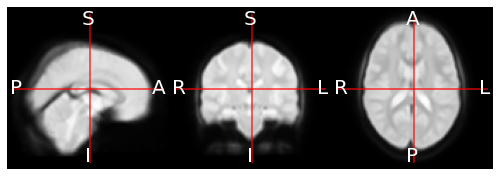

In [37]:
boldref_ims_avg = boldref_ims[0].new_image_like(mean_boldref_im)
boldref_ims_avg.plot_ortho(flat=True)

In [69]:
atlas_fit = atlas.resample_image_to_target(boldref_ims_avg,interp_type='genericLabel')
len(np.unique(atlas_fit.numpy()))

52

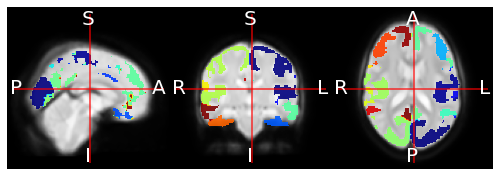

In [65]:
boldref_ims_avg.plot_ortho(atlas_fit,flat=True)

/data/aglinska/anaconda3/lib/python3.8/site-packages/ants/core/ants_image.py:498: RuntimeWarning:

invalid value encountered in greater



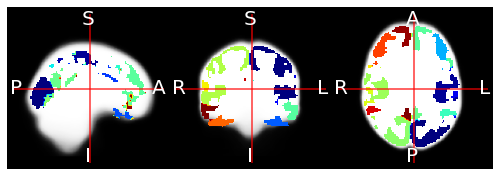

In [66]:
mmask = mask_ims[0].new_image_like(mean_mask_im)
mmask2 = mmask.copy()
mmask2[mmask2<.01] = np.nan
mmask2[mmask2>.25] = np.nan

mmask.plot_ortho(atlas_fit,flat=True,overlay_alpha=1)

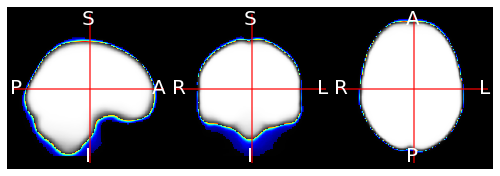

In [67]:
mmask.plot_ortho(mmask2,flat=True,overlay_alpha=1)

In [87]:
simvec = [np.corrcoef(mmask.numpy().flatten(),mask_ims[s].numpy().flatten())[0,1] for s in range(len(mask_ims))]
simvec = np.array(simvec)

(array([1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 2.00e+00,
        7.00e+00, 4.30e+01, 1.54e+02, 1.07e+03]),
 array([0.62409088, 0.65903979, 0.6939887 , 0.72893762, 0.76388653,
        0.79883544, 0.83378435, 0.86873326, 0.90368218, 0.93863109,
        0.97358   ]),
 <BarContainer object of 10 artists>)

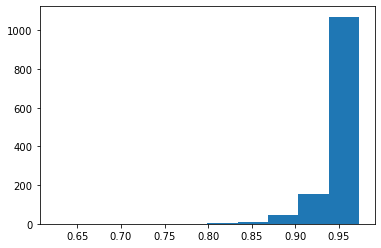

In [95]:
plt.hist(simvec)

In [ ]:
mmask.to_filename('~/mask.nii')
atlas_fit.to_filename('~/atlas_fit_gl.nii')
boldref_ims_avg.to_filename('~/boldref_ims_avg.nii')

In [71]:
atlas_fit.to_filename('../Data/YeoAtlas/atlas_fit_91_115_97.nii.gz')